In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [27]:
url = 'https://raw.githubusercontent.com/priyanshkedia04/Tweets-Classification-among-Hate-Speech-Offensive-Neither/master/data.csv'

df = pd.read_csv(url)

df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [28]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [29]:
df['class'].unique()

array([2, 1, 0])

In [30]:
df.drop(['count','hate_speech','offensive_language','neither','Unnamed: 0'],axis = 1,inplace=True)

In [31]:
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...
24778,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,1,youu got wild bitches tellin you lies


In [32]:
df.shape

(24783, 2)

In [33]:
classes = ['Hate Speech','Offensive Language','None']

Hate Speech  :  1430
Offensive Language  :  19190
None  :  4163


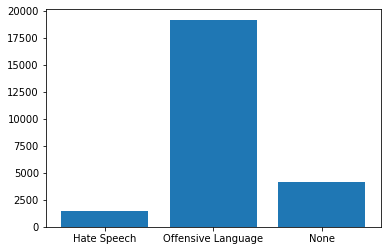

In [34]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [35]:
# checking the balancing of number of tweets and if possible balancing them. 
hate = df[df['class']==0]
offensive = df[df['class']==1]
neigther = df[df['class']==2]
print(hate.shape)
print(offensive.shape)
print(neigther.shape)

(1430, 2)
(19190, 2)
(4163, 2)


In [36]:
# we can see the data set is pretty much imbalanced hence making it balanced is our main work now..
#taking 12000 tweets as the mark we made a balanced data set..
for i in range(3):
  hate = pd.concat([hate,hate],ignore_index=True)

neigther = pd.concat([neigther,neigther,neigther],ignore_index=True)
offensive = offensive.iloc[0:12000,:]

In [37]:
print(hate.shape)
print(offensive.shape)
print(neigther.shape)

(11440, 2)
(12000, 2)
(12489, 2)


In [38]:
# submission of the three categories as shown.. 
df = pd.concat([hate,offensive,neigther],ignore_index = True)
df.shape

(35929, 2)

In [39]:
df.head()

,class,tweet
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad"
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican"
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn"
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers"
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao"


In [40]:
# tweet processing..
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [41]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
# the languages that's short format were used or may be have been used..
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food', 'u': 'you', 
     'ur':'your', 'bday' : 'birthday', 'bihday' : 'birthday'}

In [43]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some slangs
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [46]:
df['processed_tweets'] = df.tweet.apply(lambda x: clean_text(x))   # df.review.map(clean_text) Also can be used
df.head()

,class,tweet,processed_tweets
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",queer gaywad
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",alsarabsss he beaner smh tell he mexican
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",fuck gay blacklist hoe hold tehgodclan anyway
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",lmfaoooo hate black people black people nigger
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",least not nigger lmfao


In [47]:
x = df['processed_tweets']
y = df['class']

In [50]:
print(x.shape)
print(y.shape)

(35929,)
(35929,)


In [53]:
# Now finding unique words and tweets analysis..

unique_word = []

for i in x:
  for j in i.split():
    unique_word.append(j)

unique, counts = np.unique(unique_word,return_counts = True)

In [54]:
print("Total words in the tweets", len(unique_word))
print("Unique Words in the tweets", len(unique))

Total words in the tweets 275540
Unique Words in the tweets 14146


In [55]:
# finding the length of the tweets..

tweet_length = []

for i in x:
  tweet_length.append(len(i.split()))

In [57]:
print("Max length of any tweet", np.max(tweet_length))
print("Min length of any tweet",np.min(tweet_length))

Max length of any tweet 28
Min length of any tweet 0


In [58]:
tweet_length = pd.DataFrame(tweet_length)

In [60]:
tweet_length.describe()

,0
count,35929.000000
mean,7.669014
std,3.989625
min,0.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,28.000000


In [61]:
#Sorting the Unique words based on their Frequency
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,bitch,9066
1,like,3817
2,get,3636
3,hoe,3426
4,trash,3217
5,fuck,3103
6,nigga,2819
7,faggot,2239
8,as,2073
9,you,1851


In [62]:
col.describe()

,1
count,14146.000000
mean,19.478298
std,128.082239
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,9066.000000


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 8000 )
# tokenize and build vocab

vectorizer.fit(x)
# summarize

print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)

8000
(8000,)


In [64]:

x_tfidf = vectorizer.transform(x).toarray()
print(x_tfidf.shape)

(35929, 8000)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:

x_train,x_test,y_train,y_test = tts(x_tfidf,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 8000)
(1797, 8000)
(34132,)
(1797,)


In [68]:
svm_model = LinearSVC(class_weight='balanced',multi_class='crammer_singer',max_iter = -1).fit(x_train, y_train)
svm_model_predict = svm_model.predict(x_test)
svm_report = classification_report(y_test, svm_model_predict )

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       607
           1       0.94      0.86      0.90       599
           2       0.96      0.98      0.97       591

    accuracy                           0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797



In [70]:
logistic_reg_model = LogisticRegression(n_jobs = -1, penalty='l2', multi_class='multinomial',class_weight = 'balanced',verbose=1).fit(x_train,y_train)
lr_model_predict = logistic_reg_model.predict(x_test)
lr_model_report = classification_report(y_test, lr_model_predict)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.6min finished


In [71]:
print(lr_model_report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       607
           1       0.92      0.85      0.88       599
           2       0.95      0.97      0.96       591

    accuracy                           0.92      1797
   macro avg       0.92      0.92      0.92      1797
weighted avg       0.92      0.92      0.92      1797



In [73]:
# Padding and Tokenization 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [74]:
num_words = 8000
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words,oov_token = "<oov>" )
tokenizer.fit_on_texts(x)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)
length=[]
for i in sequences:
    length.append(len(i))
print(len(length))
print("Mean is: ",np.mean(length))
print("Max is: ",np.max(length))
print("Min is: ",np.min(length))

35929
Mean is:  7.669013888502324
Max is:  28
Min is:  0


In [75]:
pad_length = 24
sequences = pad_sequences(sequences, maxlen = pad_length, truncating = 'pre', padding = 'post')
sequences.shape

(35929, 24)

In [76]:
# splittig the data set..
x_train,x_test,y_train,y_test = tts(sequences,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 24)
(1797, 24)
(34132,)
(1797,)


In [77]:
from keras.layers import Dense, Embedding, Dropout , Activation, Flatten, SimpleRNN
from keras.layers import GlobalMaxPool1D
from keras.models import Model, Sequential
import tensorflow as tf

In [86]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model = Sequential([Embedding(num_words, embed_dim, input_length = pad_length),
                   SimpleRNN(8, return_sequences = True),
                   GlobalMaxPool1D(),
                   Dense(20,activation = 'relu',kernel_initializer='he_uniform'),
                   Dropout(0.25),
                   Dense(3,activation = 'softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 32)            256000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 24, 8)             328       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                180       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 256,571
Trainable params: 256,571
Non-trainable params: 0
________________________________________________

In [87]:
history = model.fit(x = x_train, y = y_train, epochs = 5,validation_split = 0.05)

Epoch 1/5
1014/1014 [==============================] - 12s 10ms/step - loss: 0.7040 - accuracy: 0.6935 - val_loss: 0.2320 - val_accuracy: 0.9221
Epoch 2/5
1014/1014 [==============================] - 10s 10ms/step - loss: 0.2294 - accuracy: 0.9300 - val_loss: 0.1998 - val_accuracy: 0.9309
Epoch 3/5
1014/1014 [==============================] - 10s 9ms/step - loss: 0.1426 - accuracy: 0.9582 - val_loss: 0.1325 - val_accuracy: 0.9619
Epoch 4/5
1014/1014 [==============================] - 10s 9ms/step - loss: 0.0952 - accuracy: 0.9737 - val_loss: 0.1137 - val_accuracy: 0.9690
Epoch 5/5
1014/1014 [==============================] - 9s 9ms/step - loss: 0.0731 - accuracy: 0.9806 - val_loss: 0.1072 - val_accuracy: 0.9672


In [88]:
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [89]:
print(train_acc,train_loss,valid_acc,val_loss)

[0.8172397613525391, 0.9342790842056274, 0.9601541757583618, 0.9724903702735901, 0.9795219898223877] [0.4917854368686676, 0.21237196028232574, 0.13754330575466156, 0.09751924127340317, 0.07560354471206665] [0.9220855236053467, 0.9308728575706482, 0.9619215130805969, 0.968951404094696, 0.9671939015388489] [0.2319694459438324, 0.1998015195131302, 0.13250546157360077, 0.11373556405305862, 0.10720933973789215]


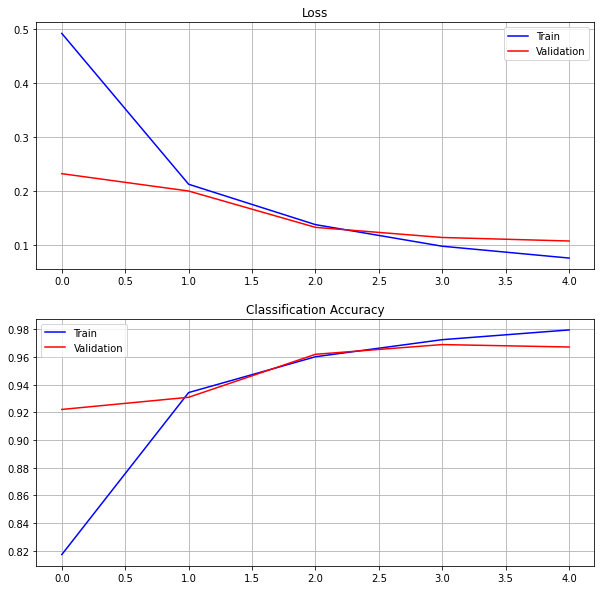

In [90]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(2, 1, 1)
plt.title('Loss')
plt.grid()
plt.plot(train_loss, color='blue', label='Train')
plt.plot(val_loss, color='red', label='Validation')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.grid()
plt.plot(train_acc, color='blue', label='Train')
plt.plot(valid_acc, color='red', label='Validation')
plt.legend()

In [92]:
predictions = model.predict(x_test)
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [93]:
from sklearn import metrics

print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       593
           1       0.98      0.90      0.94       606
           2       0.96      0.99      0.97       598

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797

